In [1]:
from word2number import w2n
import sys
sys.path.append("..")
from Vocabulary import *

vocab = Vocabulary()
vocab.load('..//vocabs//unfilteredbaseline')

print(vocab.get_size())
print(w2n.word_to_num('thirty'))

5006400
30


In [2]:
new_vocab = Vocabulary()
#first pass reduce number words
for oldword in vocab.word_frequency:
    if oldword.endswith('s'):
        length = len(oldword)
        word_shortened = oldword[0:length-1]
        try:
            new_word = w2n.word_to_num(word_shortened)
            #new_word += 's'
            if new_word in new_vocab.word_frequency:
                new_vocab.word_frequency[new_word] += vocab.word_frequency[oldword]
            else:
                new_vocab.word_frequency[new_word] = vocab.word_frequency[oldword]
        except:
            new_vocab.word_frequency[oldword] = vocab.word_frequency[oldword]
    elif oldword.endswith('th'):
        length = len(oldword)
        word_shortened = oldword[0:length-2]
        try:
            new_word = w2n.word_to_num(word_shortened)
            #new_word += 'th'
            if new_word in new_vocab.word_frequency:
                new_vocab.word_frequency[new_word] += vocab.word_frequency[oldword]
            else:
                new_vocab.word_frequency[new_word] = vocab.word_frequency[oldword]
            
        except:
            new_vocab.word_frequency[oldword] = vocab.word_frequency[oldword]
    else:
        try:
            new_word = w2n.word_to_num(oldword)
            new_word = str(new_word)
            if new_word in new_vocab.word_frequency:
                new_vocab.word_frequency[new_word] += vocab.word_frequency[oldword]
            else:
                new_vocab.word_frequency[new_word] = vocab.word_frequency[oldword]
            
        except:
            new_vocab.word_frequency[oldword] = vocab.word_frequency[oldword]
print(new_vocab.get_size())

5001408


In [3]:
array = []
for i in range(1000):
    array.append(0)

for word in new_vocab.word_frequency:
    try:
        number = int(word)
        array[number] = new_vocab.word_frequency[number]
    except:
        pass

In [4]:
print(array)

[179305, 51687, 1278, 1046, 199308, 44352, 98702, 86796, 33305, 29964, 61106, 40819, 33258, 41101, 38656, 38952, 45641, 48045, 61328, 105854, 79027, 198, 67, 121, 9517, 13031, 8192, 7903, 7503, 7133, 12008, 55, 55, 70, 3646, 3949, 3526, 3051, 3329, 3236, 7564, 26, 104, 35, 2532, 2912, 2019, 2080, 2199, 2828, 11596, 225, 91, 16, 1757, 2012, 1848, 2116, 1631, 1806, 10359, 21, 24, 7, 1312, 1693, 1451, 1268, 1048, 1594, 11014, 11, 17, 8, 1243, 2705, 1090, 1461, 1572, 1547, 12245, 16, 4, 9, 1102, 1062, 1444, 1221, 1223, 1145, 10491, 17, 14, 13, 953, 1271, 910, 930, 804, 1043, 44237, 19, 9, 7, 920, 650, 693, 595, 735, 1086, 1312, 1106, 557, 381, 370, 482, 738, 565, 391, 397, 512, 6, 16, 34, 380, 1144, 393, 369, 330, 284, 376, 19, 14, 11, 215, 363, 202, 243, 286, 197, 302, 8, 32, 10, 278, 304, 187, 276, 236, 312, 1561, 22, 22, 20, 192, 324, 228, 215, 275, 220, 329, 1, 16, 10, 259, 175, 174, 226, 270, 156, 238, 9, 45, 1, 181, 307, 183, 160, 138, 206, 448, 1, 18, 4, 185, 185, 112, 323, 196, 121

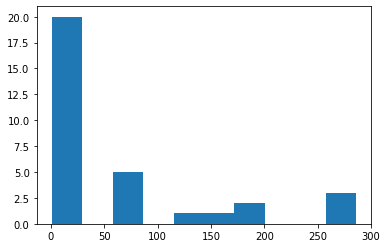

In [32]:
x = [2, 1, 76, 140, 286, 267, 60, 271, 5, 13, 9, 76, 77, 6, 2, 27, 22, 1, 12, 7, 19, 81, 11, 173, 13, 7, 16, 19, 23, 197, 167, 1]
plt.hist(x,bins=10)
plt.show()

<ipython-input-36-1409407aefa6>:6: RuntimeWarning: divide by zero encountered in log
  array2 = np.log(array)


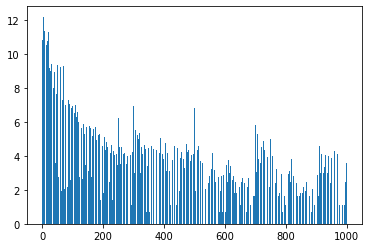

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

array2 = np.log(array)

plt.bar(range(len(array2)), array2)
plt.show()
plt.savefig('logHistogramNumbers.png')

In [4]:
import re
new_vocab2 = Vocabulary()
#first pass reduce number words
count = 0
for oldword in new_vocab.word_frequency:
    new_word = re.sub(r'[0-9]',r'N',oldword)
    if(new_word != oldword):
        count += 1
    if new_word in new_vocab2.word_frequency:
        new_vocab2.word_frequency[new_word] += new_vocab.word_frequency[oldword]
    else:
        new_vocab2.word_frequency[new_word] = new_vocab.word_frequency[oldword]
print(new_vocab2.get_size()) 
print(count)

4277328
929151


In [6]:
print(new_vocab2.filter_just_symbol_tokens())   
print(new_vocab2.get_size())   
print(new_vocab2.get_size())   

None
3988308
3988308


In [8]:
new_vocab2.word_frequency = dict(sorted(new_vocab2.word_frequency.items(),key= lambda x:x[1]))
new_vocab2.save('..\\vocabs\\NNfilteredVocab')

In [9]:
new_vocab3 = Vocabulary()
for word in new_vocab2.word_frequency:
    if '|' in word:
        pass
    else:
        new_vocab3.word_frequency[word] = new_vocab2.word_frequency[word]
print(new_vocab3.get_size())

3966405


In [11]:
removable_strings = ['<br>','br>\"','br>','<br','</br','<ref','ref>','</ref']
new_vocab4 = Vocabulary()
for word in new_vocab3.word_frequency:
    if 'nowiki' in word:
        continue
    string_cur = word
    for rem in removable_strings:
        if(rem in string_cur):
            string_cur = re.sub(rem,'',string_cur)
    if string_cur in new_vocab4.word_frequency:
        new_vocab4.word_frequency[string_cur] += new_vocab3.word_frequency[word]
    else:
        new_vocab4.word_frequency[string_cur] = new_vocab3.word_frequency[word]
print(new_vocab4.get_size())
new_vocab4.save('..\\vocabs\\NNfilteredVocab')

3954580


In [14]:
new_vocab4.filter(101)
print(new_vocab4.get_size())
new_vocab4.save('..\\vocabs\\NNfilteredVocabFilter101')

141606


In [ ]:
remove_when_contained = ['http://','https://','style=','align=','valign','bgcolor=','width=','clear=','colspan=','<','>']

In [ ]:
remove if at end
- / (if only one dot .)

In [ ]:
add ( and ) splitting in tokeniser 

In [ ]:
doktor to doctor